In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data_set=pd.read_csv("fruit_dataset.csv")
features=['mass','width','height','color_score']
target=['fruit_name']

X=data_set[features]
y=data_set[target]

X.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [4]:
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,mass,width,height,color_score
0,0.405594,0.684211,0.507692,0.000000
1,0.363636,0.578947,0.430769,0.105263
2,0.349650,0.421053,0.492308,0.131579
3,0.034965,0.105263,0.107692,0.657895
4,0.027972,0.052632,0.092308,0.631579


In [5]:
#Spliting the training data:test data in 80:20 ratio and initializing huge random_state for shuffling data, which helps in generalization
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=1234,shuffle=True)

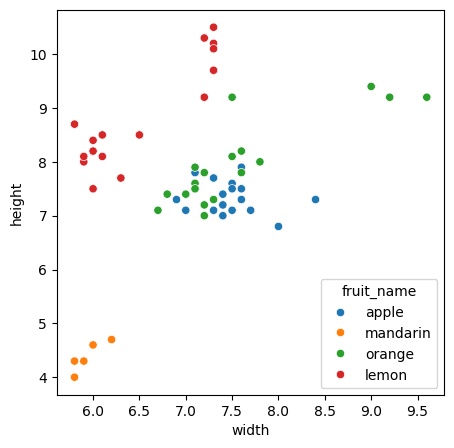

In [6]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=data_set,x='width',y='height',hue='fruit_name')
plt.show()

In [7]:
def _predict(single_test_example,X,y,k):
    #Measuring the distance
    distances=[np.sqrt(np.sum(np.square(single_test_example-x))) for x in X]

    k_indices=np.argsort(distances)[:k]
    k_nearest_neighbours=[y[i] for i in k_indices]
    #print("Print neigbors: ",k_nearest_neighbours)

    hashtable={}
    for i in k_nearest_neighbours:
        if i[0] not in hashtable:
            hashtable[i[0]]=1
        else:
            hashtable[i[0]]+=1
    
    maxi=0
    key=''
    for i in hashtable:
        if hashtable[i]>maxi:
            maxi=hashtable[i]
            key=i

    return key

In [8]:
def knn(X_train,X_test,y_train):
    predictions=[_predict(x,X_train,y_train,5) for x in X_test]
    return np.array(predictions)

In [9]:
X_train=X_train.to_numpy()
X_val=X_val.to_numpy()
y_train=y_train.to_numpy().reshape(-1,1)
preds=knn(X_train,X_val,y_train)
preds=preds.reshape(-1,1)

In [10]:
print(accuracy_score(y_val,preds))

0.9166666666666666
